### Probability ratio Encoding
1. Probability of Survived based on Cabin--- Categorical Feature
2. Probability of Not Survived---1-pr(Survived)
3. pr(Survived)/pr(Not Survived)
4. Dictonary to map cabin with probability
5. replace with the categorical feature

In [214]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib.inline

UsageError: Line magic function `%matplotlib.inline` not found.


In [215]:
df=pd.read_csv("titanic.csv",usecols=['Cabin','Survived'])

In [216]:
df.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [217]:
feature_na=[feature for feature in df.columns if df[feature].isnull().sum()>0]

In [218]:
feature_na

['Cabin']

In [219]:
for i in feature_na:
    print(i,np.round(df[i].isnull().mean(),4),"% values are misssing")

Cabin 0.771 % values are misssing


In [220]:
df['Cabin'].fillna("missing",inplace=True)

In [221]:
df.head(20)

,Survived,Cabin
0,0,missing
1,1,C85
2,1,missing
3,1,C123
4,0,missing
5,0,missing
6,0,E46
7,0,missing
8,1,missing
9,1,missing


In [222]:
df['Cabin'].unique()

array(['missing', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62

In [223]:
df['Cabin']=df['Cabin'].astype(str).str[0]

In [224]:
df

,Survived,Cabin
0,0,m
1,1,C
2,1,m
3,1,C
4,0,m
...,...,...
886,0,m
887,1,B
888,0,m
889,1,C


In [225]:
df['Cabin'].unique()

array(['m', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [226]:
prop_df=df.groupby(["Cabin"])["Survived"].mean()

In [227]:
prop_df=pd.DataFrame(prop_df)

In [228]:
prop_df

,Survived
Cabin,
A,0.466667
B,0.744681
C,0.593220
D,0.757576
E,0.750000
F,0.615385
G,0.500000
T,0.000000
m,0.299854


In [229]:
prop_df['Died']=1-prop_df['Survived']

In [230]:
prop_df.head()

,Survived,Died
Cabin,,
A,0.466667,0.533333
B,0.744681,0.255319
C,0.593220,0.406780
D,0.757576,0.242424
E,0.750000,0.250000


In [231]:
prop_df['probability']=prop_df['Survived']/prop_df['Died']

In [232]:
prop_df

,Survived,Died,probability
Cabin,,,
A,0.466667,0.533333,0.875000
B,0.744681,0.255319,2.916667
C,0.593220,0.406780,1.458333
D,0.757576,0.242424,3.125000
E,0.750000,0.250000,3.000000
F,0.615385,0.384615,1.600000
G,0.500000,0.500000,1.000000
T,0.000000,1.000000,0.000000
m,0.299854,0.700146,0.428274


In [233]:
prop_encode=prop_df['probability'].to_dict()

In [234]:
df['Cabin_encoder']=df['Cabin'].map(prop_encode)

In [235]:
df

,Survived,Cabin,Cabin_encoder
0,0,m,0.428274
1,1,C,1.458333
2,1,m,0.428274
3,1,C,1.458333
4,0,m,0.428274
...,...,...,...
886,0,m,0.428274
887,1,B,2.916667
888,0,m,0.428274
889,1,C,1.458333


In [236]:
df.drop('Cabin',axis=1,inplace=True)

In [237]:
df

,Survived,Cabin_encoder
0,0,0.428274
1,1,1.458333
2,1,0.428274
3,1,1.458333
4,0,0.428274
...,...,...
886,0,0.428274
887,1,2.916667
888,0,0.428274
889,1,1.458333


### Types of Transformation

1. Normalization And Standardization
2. Scaling to Minimum And Maximum values
3. Scaling To Median And Quantiles
4. Guassian Transformation
5. Logarithmic Transformation
6. Reciprocal Trnasformation
7. Square Root Transformation
7. Exponential Trnasformation
8. Box Cox Transformation

### Standardaization

In [344]:
df=pd.read_csv("titanic.csv",usecols=["Pclass","Age","Fare","Survived"])

In [336]:
df

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500
...,...,...,...,...
886,0,2,27.0,13.0000
887,1,1,19.0,30.0000
888,0,3,NaN,23.4500
889,1,1,26.0,30.0000


In [288]:
feature_na=[feature for feature in df.columns if df[feature].isnull().sum()>0]
feature_na

['Age']

In [289]:
for i in feature_na:
    print(i,np.round(df[i].mean()),"% missing values")

Age 30.0 % missing values


C:\Users\samcs\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

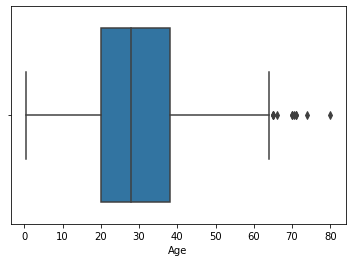

In [290]:
sns.boxplot(df['Age'])

In [291]:
for i in feature_na:
    df[i].fillna(df[i].median(),inplace=True)

In [292]:
df['Age'].isnull().sum()

0

In [293]:
from sklearn.preprocessing import StandardScaler

In [294]:
sc=StandardScaler()
df_1=sc.fit_transform(df)

In [295]:
df_1=pd.DataFrame(df_1)

In [296]:
df_1.head()

,0,1,2,3
0,-0.789272,0.827377,-0.565736,-0.502445
1,1.266990,-1.566107,0.663861,0.786845
2,1.266990,0.827377,-0.258337,-0.488854
3,1.266990,-1.566107,0.433312,0.420730
4,-0.789272,0.827377,0.433312,-0.486337


In [297]:
df_1.columns=df.columns

In [298]:
df_1

,Survived,Pclass,Age,Fare
0,-0.789272,0.827377,-0.565736,-0.502445
1,1.266990,-1.566107,0.663861,0.786845
2,1.266990,0.827377,-0.258337,-0.488854
3,1.266990,-1.566107,0.433312,0.420730
4,-0.789272,0.827377,0.433312,-0.486337
...,...,...,...,...
886,-0.789272,-0.369365,-0.181487,-0.386671
887,1.266990,-1.566107,-0.796286,-0.044381
888,-0.789272,0.827377,-0.104637,-0.176263
889,1.266990,-1.566107,-0.258337,-0.044381


In [299]:
import matplotlib.pyplot as plt
%matplotlib.inline

UsageError: Line magic function `%matplotlib.inline` not found.


(array([ 24.,   6.,  14.,   3.,   7.,   8.,   6.,   3.,   7.,  22.,  13.,
         51.,  40.,  27.,  46.,  24.,  36., 224.,  27.,  35.,  17.,  34.,
         29.,  11.,  27.,   8.,  18.,   9.,  17.,  18.,   6.,  17.,   6.,
          9.,   7.,   2.,   7.,   4.,   7.,   4.,   3.,   1.,   0.,   2.,
          3.,   0.,   1.,   0.,   0.,   1.]),
 array([-2.22415608, -2.10184187, -1.97952766, -1.85721345, -1.73489924,
        -1.61258503, -1.49027082, -1.36795661, -1.24564239, -1.12332818,
        -1.00101397, -0.87869976, -0.75638555, -0.63407134, -0.51175713,
        -0.38944292, -0.26712871, -0.1448145 , -0.02250029,  0.09981392,
         0.22212813,  0.34444234,  0.46675655,  0.58907076,  0.71138498,
         0.83369919,  0.9560134 ,  1.07832761,  1.20064182,  1.32295603,
         1.44527024,  1.56758445,  1.68989866,  1.81221287,  1.93452708,
         2.05684129,  2.1791555 ,  2.30146971,  2.42378392,  2.54609813,
         2.66841235,  2.79072656,  2.91304077,  3.03535498,  3.15766919,
 

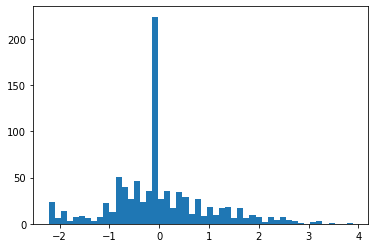

In [300]:
plt.hist(df_1['Age'],bins=50)

(array([337., 182., 147.,  50.,  16.,  39.,  18.,  29.,  18.,   2.,   8.,
          7.,   0.,   7.,   9.,   0.,   2.,   0.,   0.,   0.,   4.,   1.,
          4.,   0.,   2.,   6.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   3.]),
 array([-0.64842165, -0.44210989, -0.23579813, -0.02948636,  0.1768254 ,
         0.38313716,  0.58944893,  0.79576069,  1.00207246,  1.20838422,
         1.41469598,  1.62100775,  1.82731951,  2.03363127,  2.23994304,
         2.4462548 ,  2.65256656,  2.85887833,  3.06519009,  3.27150185,
         3.47781362,  3.68412538,  3.89043715,  4.09674891,  4.30306067,
         4.50937244,  4.7156842 ,  4.92199596,  5.12830773,  5.33461949,
         5.54093125,  5.74724302,  5.95355478,  6.15986654,  6.36617831,
         6.57249007,  6.77880184,  6.9851136 ,  7.19142536,  7.39773713,
         7.60404889,  7.81036065,  8.01667242,  8.22298418,  8.42929594,
 

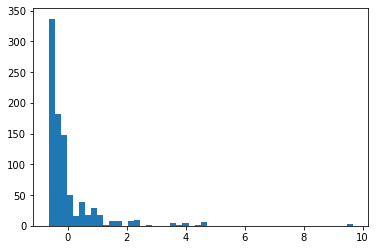

In [301]:
plt.hist(df_1['Fare'],bins=50)

C:\Users\samcs\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


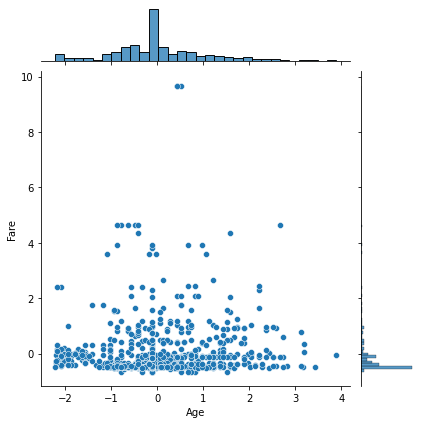

In [352]:
sns.jointplot(df_1['Age'],df_1['Fare'])

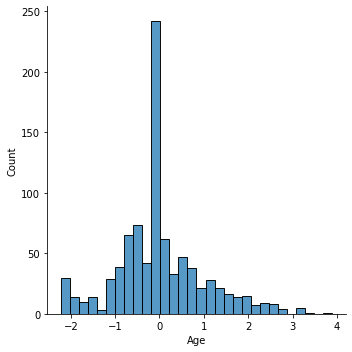

In [351]:
sns.displot(df_1['Age'])

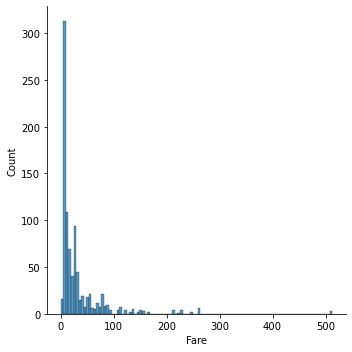

In [304]:
sns.displot(df['Fare'])

### minmax scaling

Min Max Scaling (### CNN)---Deep Learning Techniques
Min Max Scaling scales the values between 0 to 1. X_scaled = (X - X.min / (X.max - X.min)

In [307]:
from sklearn.preprocessing import MinMaxScaler

In [314]:
minmax=MinMaxScaler()

df_minmax=minmax.fit_transform(df)

In [315]:
df_minmax=pd.DataFrame(df_minmax,columns=df.columns)

In [316]:
df_minmax

,Survived,Pclass,Age,Fare
0,0.0,1.0,0.271174,0.014151
1,1.0,0.0,0.472229,0.139136
2,1.0,1.0,0.321438,0.015469
3,1.0,0.0,0.434531,0.103644
4,0.0,1.0,0.434531,0.015713
...,...,...,...,...
886,0.0,0.5,0.334004,0.025374
887,1.0,0.0,0.233476,0.058556
888,0.0,1.0,0.346569,0.045771
889,1.0,0.0,0.321438,0.058556


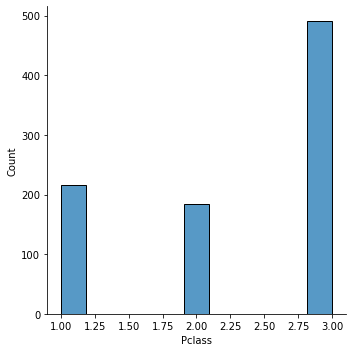

In [319]:
sns.displot(df['Pclass'])

### Robust scaler

In [345]:
from sklearn.preprocessing import RobustScaler

In [346]:
rc=RobustScaler()

In [347]:
df_rc=rc.fit_transform(df)

In [348]:
df_rc=pd.DataFrame(df_rc,columns=df.columns)

In [349]:
df_rc

,Survived,Pclass,Age,Fare
0,0.0,0.0,-0.335664,-0.312011
1,1.0,-2.0,0.559441,2.461242
2,1.0,0.0,-0.111888,-0.282777
3,1.0,-2.0,0.391608,1.673732
4,0.0,0.0,0.391608,-0.277363
...,...,...,...,...
886,0.0,-1.0,-0.055944,-0.062981
887,1.0,-2.0,-0.503497,0.673281
888,0.0,0.0,NaN,0.389604
889,1.0,-2.0,-0.111888,0.673281


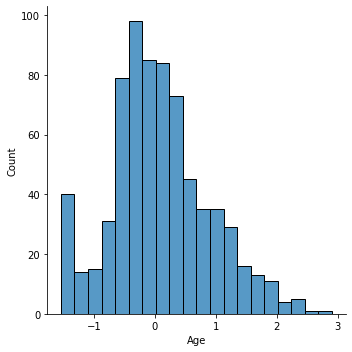

In [350]:
sns.displot(df_rc['Age'])

### Guassian Transformation

In [354]:
df=pd.read_csv("titanic.csv",usecols=["Age","Fare","Survived"])

In [355]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


C:\Users\samcs\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

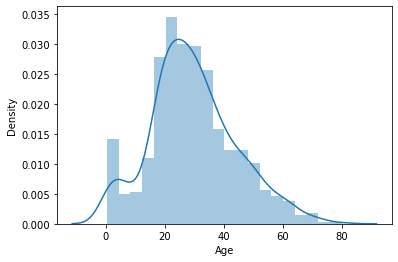

In [360]:
sns.distplot(df["Age"])

C:\Users\samcs\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

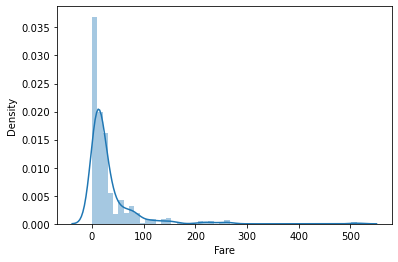

In [361]:
sns.distplot(df['Fare'])

In [362]:
df['Age'].fillna(df['Age'].median(),inplace=True)

In [363]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [365]:
import scipy.stats as stat
import pylab

In [369]:
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()
    

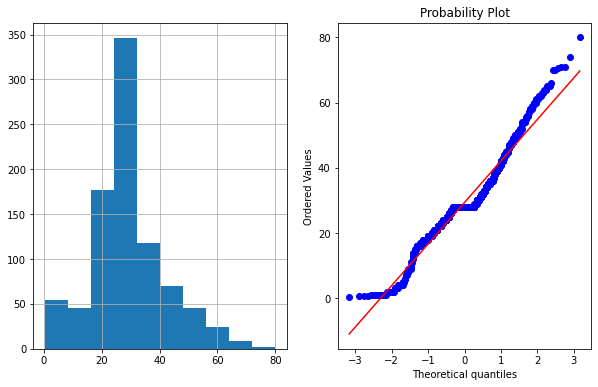

In [372]:
plot_data(df,'Age')

### Logarthemic Transformation

In [374]:
df['Age_log']=np.log(df['Age'])

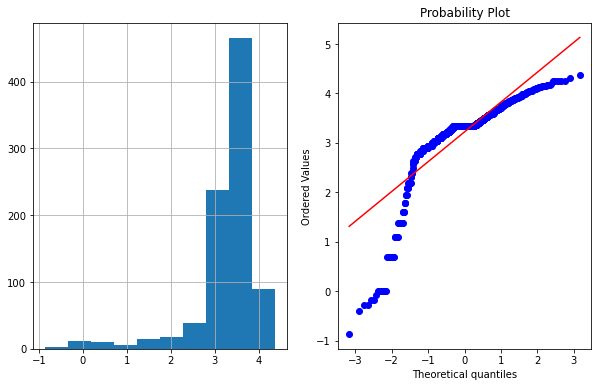

In [375]:
plot_data(df,"Age_log")

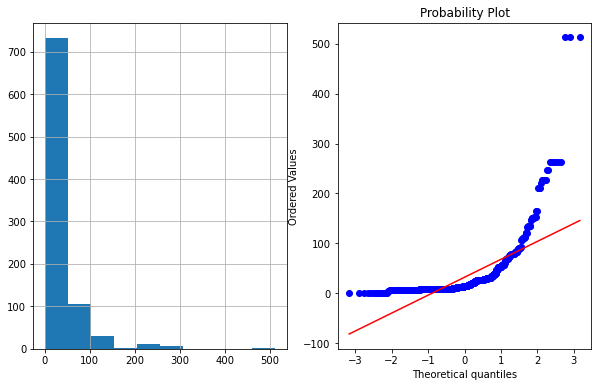

In [376]:
plot_data(df,"Fare")

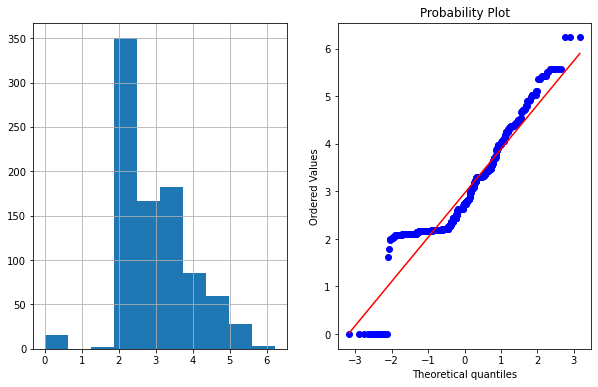

In [392]:
#### Fare
df['Fare_log']=np.log1p(df['Fare'])
plot_data(df,'Fare_log')

In [379]:
df['Fare_log'].isnull().sum()

0

### Reciprocol Transformation

In [381]:
df['Age_reciprocol']=1/df.Age

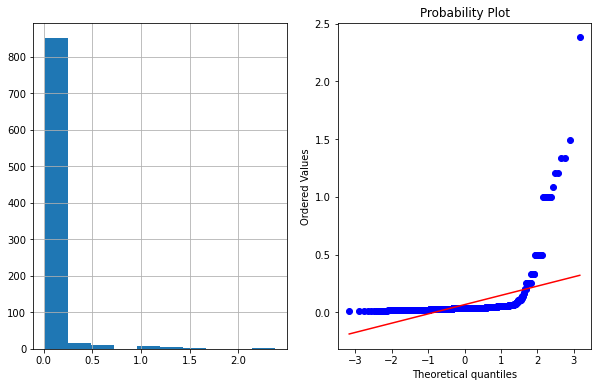

In [382]:
plot_data(df,'Age_reciprocol')

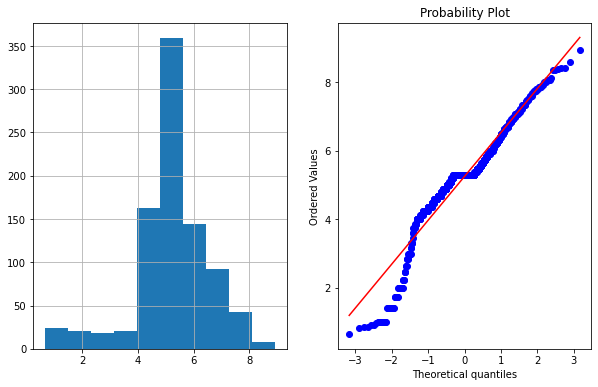

In [383]:
##### Square Root Transformation
df['Age_sqaure']=df.Age**(1/2)
plot_data(df,'Age_sqaure')

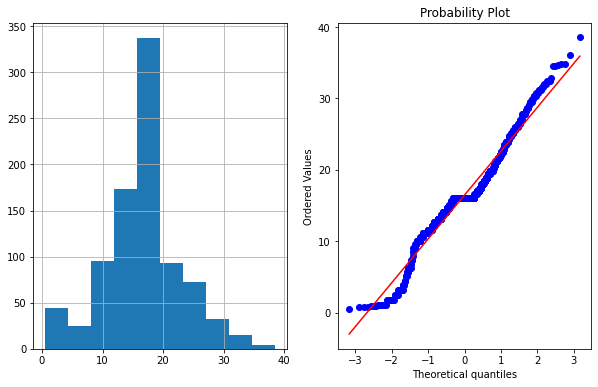

In [384]:
#### Exponential Transdormation
df['Age_exponential']=df.Age**(1/1.2)
plot_data(df,'Age_exponential')

### BoxCOx Transformation

The Box-Cox transformation is defined as:

T(Y)=(Y exp(λ)−1)/λ

where Y is the response variable and λ is the transformation parameter. λ varies from -5 to 5. In the transformation, all values of λ are considered and the optimal value for a given variable is selected.

In [386]:
stat.boxcox(df['Age'])

(array([13.468119  , 21.4987284 , 15.56341683, 20.05611014, 20.05611014,
        16.58601436, 28.84746463,  0.92513402, 16.07664335,  9.01695462,
         2.53193075, 30.6104327 , 12.39181078, 21.97437834,  9.01695462,
        29.29062758,  0.92513402, 16.58601436, 18.09258499, 16.58601436,
        20.05611014, 19.56971919,  9.59722218, 16.58601436,  5.32265694,
        21.4987284 , 16.58601436, 11.84551333, 16.58601436, 16.58601436,
        22.44755196, 16.58601436, 16.58601436, 34.06447944, 16.58601436,
        23.38676361, 16.58601436, 12.93257404, 11.29332892,  9.01695462,
        22.44755196, 16.07664335, 16.58601436,  1.75636071, 11.84551333,
        16.58601436, 16.58601436, 16.58601436, 16.58601436, 11.29332892,
         4.65897047, 12.93257404, 26.60575762, 17.09169505, 33.6375945 ,
        16.58601436, 12.93257404, 16.83930618,  3.26857952,  7.221786  ,
        13.468119  , 21.4987284 , 24.77874367,  2.53193075, 16.58601436,
        16.58601436, 17.09169505, 11.84551333, 10.7

In [388]:
df['Age_Boxcox'],parameters=stat.boxcox(df['Age'])

In [389]:
print(parameters)

0.7964531473656952


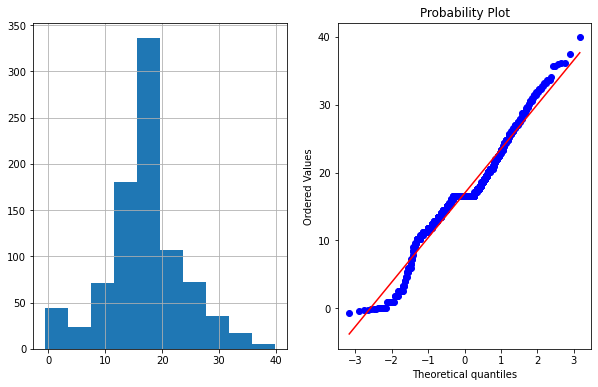

In [390]:
plot_data(df,'Age_Boxcox')

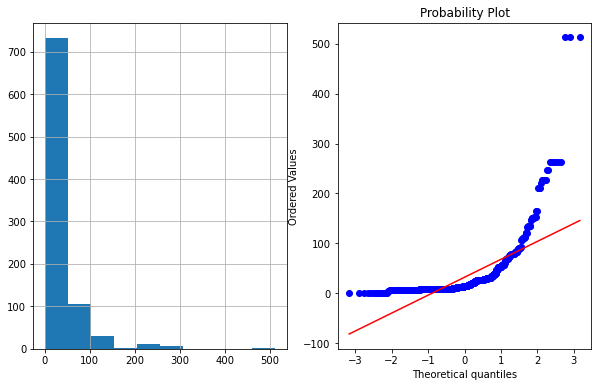

In [391]:
plot_data(df,'Fare')